In [1]:
#-*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题

In [2]:
# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化    
    return X_norm,mu,sigma

# 画二维图
def plot_X1_X2(X):
    plt.scatter(X[:,0],X[:,1])
    plt.show()

In [3]:
# 梯度下降算法
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)      
    n = len(theta)
    
    temp = np.matrix(np.zeros((n,num_iters)))   # 暂存每次迭代计算的theta，转化为矩阵形式
    
    J_history = np.zeros((num_iters,1)) #记录每次迭代计算的代价值
    
    for i in range(num_iters):  # 遍历迭代次数    
        h = np.dot(X,theta)     # 计算内积，matrix可以直接乘
        temp[:,i] = theta - ((alpha/m)*(np.dot(np.transpose(X),h-y)))   #梯度的计算
        theta = temp[:,i]
        J_history[i] = computerCost(X,y,theta)      #调用计算代价函数    
    return theta,J_history  

# 计算代价函数
def computerCost(X,y,theta):
    m = len(y)
    J = 0  
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m) #计算代价J
    return J

# 画每次迭代代价的变化图
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel(u"迭代次数",fontproperties=font) # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"代价值",fontproperties=font)
    plt.title(u"代价随迭代次数的变化",fontproperties=font)
    plt.show()

In [4]:
def linearRegression(alpha=0.01,num_iters=400):
    print u"加载数据...\n"
    
    data = np.loadtxt("../data/1-linear_regression/data.txt",delimiter=",",dtype=np.float64) #读取数据
    X = data[:,0:-1]      # X对应0到倒数第2列                  
    y = data[:,-1]        # y对应最后一列  
    m = len(y)            # 总的数据条数
    col = data.shape[1]      # data的列数
    
    X,mu,sigma = featureNormaliza(X)    # 归一化
    plot_X1_X2(X)         # 画图看一下归一化效果
    
    X = np.hstack((np.ones((m,1)),X))    # 在X前加一列1
    
    print u"\n执行梯度下降算法....\n"
    
    theta = np.zeros((col,1))
    y = y.reshape(-1,1)   #将行向量转化为列
    theta,J_history = gradientDescent(X, y, theta, alpha, num_iters)
    
    plotJ(J_history, num_iters)
    
    return mu,sigma,theta   #返回均值mu,标准差sigma,和学习的结果theta

### 迭代效果

加载数据...



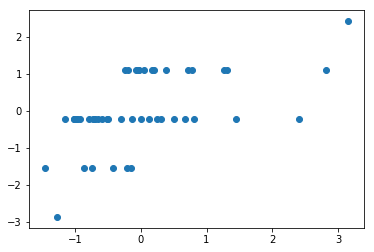


执行梯度下降算法....



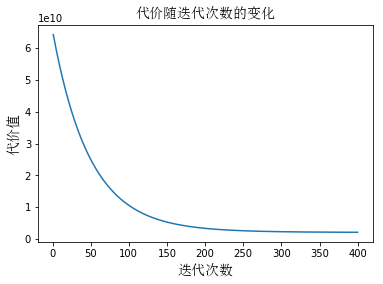


计算的theta值为：
[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]


In [5]:
mu,sigma,theta = linearRegression(0.01,400)
print u"\n计算的theta值为：\n",theta

### 预测

In [6]:
result = 0
# 注意归一化
predict = np.array([1650,3])
norm_predict = (predict-mu)/sigma
final_predict = np.hstack((np.ones((1)),norm_predict))

result = np.dot(final_predict,theta)    # 预测结果
print result

[[ 289221.54737122]]
